<a href="https://colab.research.google.com/github/Karthick47v2/mock-buddy/blob/base-dev/model_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras

from google.colab import drive
drive.mount('/content/gdrive')

!unzip gdrive/MyDrive/300cw/300w_96.zip

In [8]:
train_df = pd.read_csv('train.csv')
train_df = train_df.iloc[:4000,:]
img_size = 96 
no_channel = 1
batch_size = 64

data_gen = keras.preprocessing.image.ImageDataGenerator(validation_split=0.2)
train_data_gen = data_gen.flow_from_dataframe(dataframe=train_df, directory='./',x_col='path',
                                              y_col=[f"{i}" for i in range(136)], class_mode='raw', subset='training',
                                              batch_size=batch_size, seed=42, shuffle=True, target_size=(img_size, img_size),
                                              color_mode='grayscale')

validation_data_gen = data_gen.flow_from_dataframe(dataframe=train_df, directory='./',x_col='path',
                                              y_col=[f"{i}" for i in range(136)], class_mode='raw', subset='validation',
                                              batch_size=batch_size, seed=42, shuffle=True, target_size=(img_size, img_size),
                                              color_mode='grayscale')

Found 3200 validated image filenames.
Found 800 validated image filenames.


In [4]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    'checkpoint',
    monitor='val_root_mean_squared_error',
    save_best_only=True,
    save_weights_only=False,
    mode='min',
    save_freq="epoch",
)


def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    elif (epoch % 10) == 0:
        return lr * 0.9
    return lr
    
shd = keras.callbacks.LearningRateScheduler(scheduler)

In [9]:
model_input = keras.Input(shape=(img_size, img_size, no_channel))

# # block_1
x = keras.layers.Conv2D(filters=16, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(model_input)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(filters=16, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(filters=16, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)



# # block_1
x = keras.layers.Conv2D(filters=32, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(filters=32, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(filters=32, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = keras.layers.BatchNormalization()(x)


# # block_2
x = keras.layers.Conv2D(filters=48, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(filters=48, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(filters=48, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = keras.layers.BatchNormalization()(x)


# # block_3
x = keras.layers.Conv2D(filters=64, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(filters=64, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(filters=64, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = keras.layers.BatchNormalization()(x)


# # block_4
x = keras.layers.Conv2D(filters=80, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(filters=80, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.BatchNormalization()(x)

x = keras.layers.Conv2D(filters=80, kernel_size=(3,3), kernel_initializer='he_uniform', activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D(pool_size=(2,2))(x)
x = keras.layers.BatchNormalization()(x)


# # last block
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dense(units=136, kernel_initializer='he_uniform')(x)

model = keras.Model(model_input, x)

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.004), loss='mean_squared_error', metrics=[keras.metrics.RootMeanSquaredError()])

# model.summary()

history = model.fit(train_data_gen, epochs=200, batch_size=batch_size, validation_data=validation_data_gen, callbacks=[shd, model_checkpoint])

Epoch 1/200
50/50 [==============================] - 5s 68ms/step - loss: 2601.4929 - root_mean_squared_error: 51.0048 - val_loss: 27308.1504 - val_root_mean_squared_error: 165.2518 - lr: 0.0040
Epoch 2/200
50/50 [==============================] - 3s 57ms/step - loss: 1758.5867 - root_mean_squared_error: 41.9355 - val_loss: 746.2158 - val_root_mean_squared_error: 27.3169 - lr: 0.0040
Epoch 3/200
50/50 [==============================] - 3s 57ms/step - loss: 622.9631 - root_mean_squared_error: 24.9592 - val_loss: 317.1370 - val_root_mean_squared_error: 17.8083 - lr: 0.0040
Epoch 4/200
50/50 [==============================] - 3s 57ms/step - loss: 119.4162 - root_mean_squared_error: 10.9278 - val_loss: 88.5212 - val_root_mean_squared_error: 9.4086 - lr: 0.0040
Epoch 5/200
50/50 [==============================] - 3s 57ms/step - loss: 27.8913 - root_mean_squared_error: 5.2812 - val_loss: 34.8449 - val_root_mean_squared_error: 5.9030 - lr: 0.0040
Epoch 6/200
50/50 [===========================

In [54]:
import cv2

my_model = keras.models.load_model('checkpoint')

test_df = pd.read_csv('test_ibug.csv')

# helen_test_df, lfpw_test_df = pd.read_csv('test_helen.csv'), pd.read_csv('test_lfpw.csv')
# test_df = pd.concat([helen_test_df, lfpw_test_df], axis=0)

image = [cv2.imread('./' + row.iloc[0], flags=cv2.IMREAD_GRAYSCALE).reshape(96,96,1) for idx, row in test_df.iterrows()]

y_hat = []
for img in image:
    y_hat.append(my_model.predict(np.expand_dims(img,0)))


val = 0
result = []
i = 0
for idx, row in test_df.iterrows():
    y_true, y_pred = row.iloc[1:137].values.reshape(68,2), y_hat[i].reshape(68,2)
    i += 1
    iod = np.linalg.norm(y_true[36]-y_true[45])
#     iod = np.sum(np.power((y_true[36]-y_true[45]),2))
    m = 0  
    for j in range(68):
        m = m + np.linalg.norm(y_pred[j]-y_true[j])
#     print(np.linalg.norm(y_pred-y_true))
    result.append(m / (68 * iod))

In [55]:
print('iBUG') # 14
print (f"Cumalative: {sum(result)}")
print(f"Avg: {sum(result)/len(y_hat)}")

iBUG
Cumalative: 11.476198234569605
Avg: 0.08500887581162671


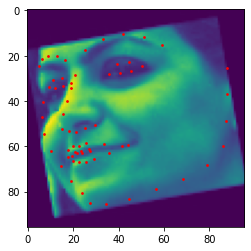

In [10]:
import cv2
train_df = pd.read_csv('train.csv')
image = cv2.imread('./' + train_df.iloc[8077,0], flags=cv2.IMREAD_GRAYSCALE).reshape(96,96,1)
plt.imshow(image.reshape(96,96))
y_hat = (model.predict(np.expand_dims(image,0)))
plt.scatter(y_hat[0][:136:2] ,y_hat[0][1:136:2], s=3, c='r')

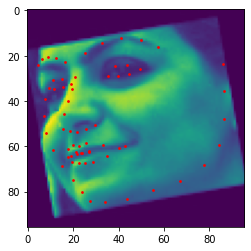

In [11]:
my_model = keras.models.load_model('checkpoint')

import cv2
train_df = pd.read_csv('train.csv')
image = cv2.imread('./' + train_df.iloc[8077,0], flags=cv2.IMREAD_GRAYSCALE).reshape(96,96,1)
plt.imshow(image.reshape(96,96))
y_hat = (my_model.predict(np.expand_dims(image,0)))
plt.scatter(y_hat[0][:136:2] ,y_hat[0][1:136:2], s=3, c='r')